In [1]:
using Flux
using Statistics

In [2]:
make_grid(nx, ny) = vcat(repeat(Base.OneTo(nx), outer=(ny,1))', repeat(Base.OneTo(ny), inner=nx)')

make_grid (generic function with 1 method)

In [3]:
normalize(arr) =  2*(arr .- 1)./(arr[:,end] .- 1) .- 1

normalize (generic function with 1 method)

In [4]:
network = f64(Chain(Dense(34, 128, relu),Dense(128, 128, relu),Dense(128, 128, relu),Dense(128, 128, relu),Dense(128, 3, σ)))

Chain(
  Dense(34, 128, relu),                 # 4_480 parameters
  Dense(128, 128, relu),                # 16_512 parameters
  Dense(128, 128, relu),                # 16_512 parameters
  Dense(128, 128, relu),                # 16_512 parameters
  Dense(128, 3, σ),                     # 387 parameters
)                   # Total: 10 arrays, 54_403 parameters, 425.648 KiB.

In [5]:
loss(x,y) = mean(abs2, network(x) .- y)

loss (generic function with 1 method)

In [6]:
network_params = params(network);

In [7]:
using TestImages
using ImageShow

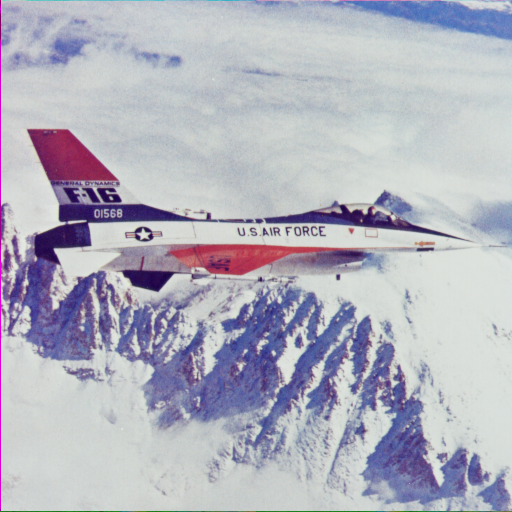

In [8]:
pic = testimage("airplane")

In [9]:
using StatsBase

In [10]:
function sample_points(points, colors, ns)
    inds = sample(1:size(points)[2], ns, replace=false)'
    sampled_points = vcat(points[1:1,:][inds], points[2:2,:][inds])
    sampled_colors = vcat(colors[1:1,:][inds], colors[2:2,:][inds], colors[3:3,:][inds])
    return sampled_points, sampled_colors
end

sample_points (generic function with 1 method)

In [11]:
using Images

In [12]:
image_colors = Float64.(channelview(pic))
nc, nx, ny = size(image_colors)

(3, 512, 512)

In [13]:
image_points = normalize(make_grid(nx, ny))

2×262144 Matrix{Float64}:
 -1.0  -0.996086  -0.992172  -0.988258  …  0.988258  0.992172  0.996086  1.0
 -1.0  -1.0       -1.0       -1.0          1.0       1.0       1.0       1.0

In [14]:
image_colors = reshape(image_colors, (nc, nx*ny))

3×262144 Matrix{Float64}:
 0.709804  0.552941  0.552941  0.552941  …  0.619608  0.654902  0.419608
 0.0       0.0       0.0       0.0          0.564706  0.643137  0.458824
 0.384314  0.423529  0.423529  0.447059     0.658824  0.721569  0.211765

In [15]:
using Plots

In [16]:
function fourier_map(x, k)
    x = repeat(x, k)
    b = 2 .^repeat(collect(0:k-1), inner=(2,1))
    return vcat(sin.(b.*π.*x), cos.(b.*π.*x))
end

fourier_map (generic function with 1 method)

In [17]:
losses = zeros(100000)
for i=1:100000
    sampled_points, sampled_colors = sample_points(image_points, image_colors, 1024)
    sampled_points_fourier = vcat(sampled_points, fourier_map(sampled_points, 8))
    losses[i] = loss(sampled_points_fourier, sampled_colors)
    if mod(i,100) == 0
        println(losses[i])
    end
    Flux.train!(loss, network_params, [(sampled_points_fourier, sampled_colors)], ADAM())
end

0.017694259541092664
0.014852962157971028
0.0127654455785529
0.012314363118268168
0.010774981499263944
0.010406231100773386
0.00970240493476151
0.008679739570166605
0.00865531869474401
0.008757257132110714
0.008568573944034383
0.008354590595058272
0.007837846099333315
0.0074513561770613275
0.007251420205242283
0.007586920341059081
0.006923389469870579
0.006981546006655207
0.006712145710330041
0.006223848057907876
0.006415332151410678
0.005869203723606443
0.005877797330802557
0.005563680664547317
0.005727808866025533
0.005179101727608569
0.005676874332189721
0.00567961363978911
0.006121375445550439
0.005493692029340265
0.006050875296614092
0.0058049020860358146
0.005189149540931957
0.00507195904777281
0.0043910049881731375
0.0061485073323277
0.004724146671167452
0.005004414410460454
0.004338088914265489
0.00456629678031687
0.004667146871791415
0.004924749457750976
0.004646848771298501
0.004312465040329231
0.005052183010989773
0.004176804128325632
0.004155573395097896
0.00423749396073207

0.0010518227292752392
0.0011051533716029526
0.0010754852220835754
0.001241382670001441
0.0010579749108443437
0.0011094993160255721
0.0011536193315570594
0.001072180185643805
0.0010065283790799452
0.0012883487023327537
0.0010437417703304402
0.0011040336178884914
0.0010784125483884793
0.0012115403067797738
0.0010885401461334107
0.0011232874071425713
0.0011025757763811848
0.0011362240940743374
0.001165417566495066
0.0011175867603421593
0.0010211233145873283
0.001097084583804418
0.0011650866537007694
0.0010189592892302498
0.0011726118457706363
0.0010206429029105573
0.0009754249016947497
0.0009737491379094946
0.0009405735391874766
0.001074842769153713
0.0009861866842271394
0.0009885173977306422
0.0009637502100839512
0.0011302625896304366
0.0010537588459602315
0.0011394183331924295
0.0011278231850471159
0.0010640173322022863
0.0010945470875213215
0.0010653999389429387
0.001146004881318773
0.0011041825991348368
0.0009922312352706757
0.0011246895398057352
0.0009525826806991358
0.00089330429747

0.0007447237274450986
0.000763882646187627
0.0006674525923364419
0.0007521608345565414
0.0007829823699790541
0.000767805327229179
0.0006842272768578817
0.0006953934892531037
0.0008799181294306511
0.0008373216011960876
0.0007671641168720952
0.0007605775073612746
0.0007446812229962881
0.0007726614686386847
0.0007486794507700232
0.0008447292288984151
0.0007554018796435778
0.0007019711566029654
0.0007178347066281914
0.0007471572853993653
0.000717468640779442
0.0007944402148880678
0.0007632510331911698
0.0007832967394268315
0.0006770514787415117
0.0006768134302343147
0.0007275178787998041
0.0006852948876329002
0.0006495632904830942
0.0006731681497998722
0.0007244710811782114
0.0008092305363206569
0.0008195625031366489
0.0007313500089079104
0.0008095193991015012
0.0007393562372255722
0.0006441205607521208
0.0007652491884100502
0.0007949807960158433
0.0007739674825710411
0.000717781703470725
0.0007411241460691418
0.000741877862623648
0.0007892281129681213
0.0007492355909797696
0.0008208012473

In [18]:
generated_image = network(vcat(image_points, fourier_map(image_points, 8)))

3×262144 Matrix{Float64}:
 0.631534   0.59939    0.59223    0.618792    …  0.719964  0.671638  0.393145
 0.0369854  0.0403052  0.0186101  0.00914743     0.700212  0.640205  0.545634
 0.484134   0.457011   0.485548   0.497825       0.718287  0.67579   0.316055

In [19]:
generated_image = reshape(generated_image, (nc, nx, ny));

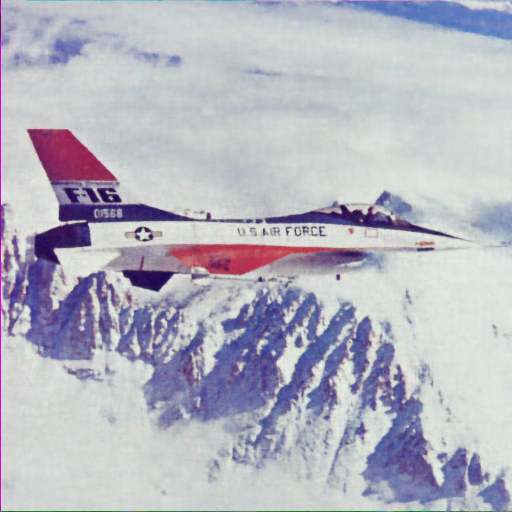

In [20]:
colorview(RGB, generated_image)